In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Input,Dense,Conv2D,Dropout,Dropout,MaxPooling2D,BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling2D,Flatten
from tensorflow.keras.applications import Xception,VGG16,VGG19,MobileNetV2,ResNet50V2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
print("Test fake frames are : ",len(os.listdir('/content/drive/MyDrive/frame_test/fake')))
print("Test real frames are : ",len(os.listdir('/content/drive/MyDrive/frame_test/real')))
print("Train fake frames are : ",len(os.listdir('/content/drive/MyDrive/frame_train/fake')))
print("Train real frames are : ",len(os.listdir('/content/drive/MyDrive/frame_train/real')))

Test fake frames are :  1720
Test real frames are :  1720
Train fake frames are :  8600
Train real frames are :  8600


In [ ]:
print(os.listdir('/content/drive/MyDrive/frame_train'))
print(os.listdir('/content/drive/MyDrive/frame_test'))

['fake', 'real']
['fake', 'real']


In [ ]:
import shutil
shutil.rmtree('/content/drive/MyDrive/frame_train/.ipynb_checkpoints')
shutil.rmtree('/content/drive/MyDrive/frame_test/.ipynb_checkpoints')

FileNotFoundError: ignored

**Simple CNN**

In [ ]:
trainpath = '/content/drive/MyDrive/frame_train'
testpath = '/content/drive/MyDrive/frame_test'
train_generator = image_dataset_from_directory(trainpath,labels='inferred',label_mode="binary",
                        color_mode="rgb" , batch_size=64,image_size=(256,256),shuffle=False)
test_generator =  image_dataset_from_directory(testpath,labels='inferred',label_mode="binary",
                        color_mode="rgb",batch_size=64,image_size=(256,256),shuffle=False)

Found 17200 files belonging to 2 classes.
Found 3440 files belonging to 2 classes.


In [ ]:
# model = tf.keras.Sequential([
#                     tf.keras.layers.experimental.preprocessing.Rescaling(1./255,input_shape=(256,256,3)),
#                     Conv2D(128,(3,3),padding="same",activation="relu"),
#                     BatchNormalization(),
#                     MaxPooling2D(),
#                     Conv2D(64,(3,3),padding="same",activation='relu'),
#                     BatchNormalization(),
#                     MaxPooling2D(),
#                     Conv2D(32,(3,3),padding="same",activation='relu'),
#                     BatchNormalization(),
#                     Flatten(),
#                     Dense(128,activation='relu'),
#                     Dense(128,activation='relu'),
#                     Dense(1,activation="sigmoid")
# ])
learning_rate = 0.0001

model = Sequential()
model.add(preprocessing.Rescaling(1./255,input_shape=(256,256,3)))
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'valid', 
                 activation ='relu',input_shape = (256,256,3)))
# model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'valid', 
#                  activation ='relu'))
# model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (3,3)))

model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dropout(0.75))
# model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
model.compile(loss = 'binary_crossentropy',optimizer = Adam() , metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_10 (Rescaling)     (None, 256, 256, 3)       0         
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 254, 254, 8)       224       
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 84, 84, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 56448)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 451592    
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [ ]:
history=model.fit(test_generator , epochs = 1, validation_data=test_generator)

54/54 [==============================] - 116s 302ms/step - loss: 6.4488 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5000


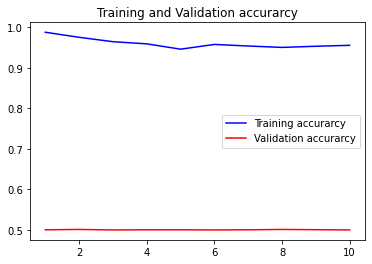

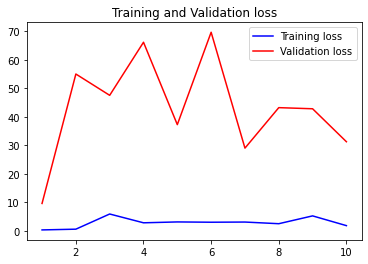

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()

# Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
def get_config(self):
    config = super().get_config().copy()
    config.update({
        'return_sequences': self.return_sequences 
    })
    return config

In [ ]:
model.save('deepfake_images1.h5')

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

AssertionError: ignored